<H1><center><font color='brown'><strong>Bank Marketing Campaign Analysis</strong></font>
<br>----------


<H3><font color='brown'>By : Group Delta</font>
<br>- Fathur Rizky Maulana
<br>- Alfian Abdul Ghaffar
<br>- Dafiq Alfaiz
<br>-------------------------

# **Contents**

0. Initial Setup
1. Business Problem Understanding
2. Data Understanding and Data Preparation
----
----

<h2><strong><span style="background-color: yellow; padding: 5px;">1. Initial Setup</span></strong></h2>

In [1]:
# Import library eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Membuat grafik
import seaborn as sns #Membuat grafik
import missingno as msno #Cek missing value

# statistics
from scipy.stats import normaltest, mannwhitneyu, chi2_contingency

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce

# Imbalance data
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NeighbourhoodCleaningRule, NearMiss
from imblearn.combine import SMOTEENN

# Model Selection
from sklearn.model_selection import StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, recall_score, fbeta_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
import lightgbm as lgb

# Pipeline
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

<h2><strong><span style="background-color: yellow; padding: 5px;">1. Business Problem Understanding</span></strong></h2>


### **1.1 Context**

[Term Deposit](https://www.forbes.com/advisor/au/personal-finance/guide-to-term-deposits-in-australia/) atau tabungan berjangka adalah jenis rekening tabungan yang memberikan suku bunga tetap selama jangka waktu tertentu, biasanya satu bulan hingga lima tahun. yang membedakan jenis tabungan ini dengan tabungan konvensional lainnya adalah bahwa pada Term Deposit, nasabah tidak diperbolehkan mengambil dana yang sudah di setor selama jangka waktu deposit, jika nasabah menarik dana nya sebelum waktu deposit, maka nasabah akan dikenai biaya.

Dalam dunia perbankan, deposit memiliki peran penting bagi pertumbuhan industri perbankan. Bank membutuhkan dana yang disetorkan nasabah (Term Deposit) sebagai sumber dana yang dapat digunakan untuk memberikan pinjaman kepada nasabah lain dan menginvestasikan dana tersebut kepada calon investor. Dana deposit juga membantu bank dalam menjaga likuiditas dan stabilitas keuangan dari perusahaan bank tersebut. Sehingga bank harus terus meningkatkan jumlah nasabah yang menggunakan produk term deposit yang ditawarkan sehingga pada akhirnya akan memberikan manfaat jangka panjang dalam mendukung pertumbuhan dan kestabilitasan keuangan bank.

### **1.2 Problem Statement**

Proses menarik nasabah untuk mau menggunakan/ berlangganan produk Term Deposit memerlukan waktu dan sumber daya yang besar jika perusahaan melakukan usaha campaign tersebut kepada semua nasabah. Terlebih menurut [Brian Williams, Ph.D](https://blog.thebrevetgroup.com/21-mind-blowing-sales-stats), rata-rata sales menghubungi calon nasabah sebanyak lima kali agar calon nasabah tertarik menggunakan produk yang kita tawarkan. Sehingga perusahaan ingin meningkatkan efisiensi marketing campaign dengan memfokuskan campaign berikutnya kepada calon nasabah yang memiliki peluang untuk menggunakan produk Term Deposit berdasarkan karakteristik nasabah yang telah menggunakan produk Term Deposit. Oleh karena itu dibutuhkan sebuah model yang dapat menjadi solusi untuk permasalahan tersebut, agar sebuah bank dapat menentukan calon nasabah yang berpeluang tinggi akan menggunakan term deposit melalui analisa data nasabah untuk mencapai tujuan. 

### **1.3 Project Stakeholders:**

Pihak stakeholders yang terlibat dan yang akan menggunakan model dari analisis ini adalah:
* ***Sales & Marketing Team***: Tim ini akan bertanggung jawab dalam mengembangkan dan merencanakan usaha marketing serta mengimplementasikan kepada pelanggan secara tepat dalam upaya memaksimalkan pendapatan perusahaan.
* ***Finance Team***: Tim ini akan bertanggung jawab dalam mengatur keuangan perusahaan yang diakibatkan oleh usaha marketing.

Seluruh pihak diatas memiliki tujuan yang sama yaitu memaksimalkan pendapatan perusahaan dari nasabah yang akan menggunakan produk term deposit dengan tepat

### **1.4 Goals**

Berdasarkan Problem Statement diatas, perusahaan ingin memiliki kemampuan untuk dapat memprediksi nasabah mana yang memiliki potensi untuk mau menggunakan/ berlangganan produk Term Deposit pada campaign berikutnya, sehingga tim marketing dapat lebih memfokuskan campaign berikutnya kepada calon nasabah yang terprediksi akan menggunakan produk Term Deposit berdasarkan karakteristik dari nasabah yang menggunakan/ berlangganan Term Deposit pada campaign sebelumnya.

Selain itu, untuk meningkatkan pelayanan dan performa dari bank itu sendiri, perusahaan juga ingin mengetahui faktor atau variabel apa yang membuat nasabah mau menggunakan atau berlangganan Term Deposit. Sehingga perusahaan dalam hal ini akan membuat perencanaan yang lebih baik lagi dalam mendekati calon nasabah yang potensial (nasabah yang ingin membuka Term Deposit)

### **1.5 Analytic Approach**

Dalam hal ini, kita akan menganalisis data untuk mencari pola yang bisa membedakan antara kategori nasabah yang ingin membuka Term Deposito atau tidak. Selain itu, kita juga akan membangun model klasifikasi yang akan membantu stakeholders untuk memprediksi probabilitas nasabah ingin membuka Term Deposit atau tidak. 

### **1.6 Metric Evaluation**

Karena kita akan memfokuskan pada nasabah yang berminat untuk mengajukan ***Term Deposit***, maka target yang kita tetapkan adalah sebagai berikut:

**Target**:   
`yes` : Nasabah Yang Menggunakan ***Term Deposit*** (Positive)
<br>
`no` : Nasabah Yang Tidak Menggunakan ***Term Deposit*** (Negative)

**Metric Evaluation**:

|                                | ***Tidak Term Deposit*-`Pred`** | ***Term Deposit*-`Pred`** |
| ------------------------------ | ------------------------------- | ------------------------- |
| ***Tidak Term Deposit*-`Act`** |               TN                |             FP            |
| ***Term Deposit*-`Act`**       |               FN                |             TP            |

**`Type 1 Error`** : **False Positive**
<br>
`Interpretasi`: Nasabah yang aktualnya tidak Menggunakan *Term Deposit*, tapi terprediksi sebagai Nasabah yang Menggunakan *Term Deposit* 
<br>
`Konsekuensi`: 
* Bank akan mengeluarkan biaya yang sia-sia, karena Bank akan menghabiskan biaya untuk melakukan campaign kepada calon nasabah yang tidak akan Menggunakan *Term Deposit*
* Rincian biaya yang dikeluarkan untuk biaya marketing per orang: ([CPM]())
    * Budget marketing untuk deposito: 1% - 3% dari revenue ([sumber](https://emiboston.com/leading-u-s-banks-boosted-marketing-spend-in-2022/))
    * Minimal pembukaan rekening deposito CDs: $1,000 / 955.35 EUR (kurs $1 = 0.96EUR) ([Certificate of Deposit](https://www.forbes.com/advisor/banking/bank-account-minimum-deposit-minimum-balance-requirements/))
    * Jumlah Nasabah: 41,188 ([*Sumber dari dataset*](https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset))
        * Nasabah menggunakan Term Deposit: 4,640
        * Nasabah tidak menggunakan Term Deposit: 36,548
    * Kita akan menghitung budget marketing untuk melakukan Term Deposit Campaign
    $$ Marketing Budget = {(Nasabah\ menggunakan\ Term\ Deposit\times Min\ Opening\ Deposit)\times Budget\ marketing\ untuk\ deposito} $$ 
    $$ Marketing Budget = {(4,640\times 955.35\ EUR)\times 3\%} $$ 
    $$ Marketing Budget = {132,984.72\ EUR} $$ 
    *Marketing budget untuk campaign Term Deposit sebelumnya adalah 132,984.72 EUR, selanjutnya kita akan menghitung biaya campaign untuk per nasabahnya, sebagai berikut:* 
    $$ CPM =  \frac {Marketing\ Budget}{Total\ nasabah} $$
    $$ CPM =  \frac {132,984.72\ EUR}{41,188} $$
    $$ CPM =  3.23\ EUR $$

*Dari hasil CPM diatas bisa dikatakan Bank akan mengeluarkan biaya marketing sebesar 3.23 Euro per nasabah. Sehingga ketika bank salah memutuskan/ melabeli nasabah yang ingin membuka Term Deposit dan ternyata tidak ingin membuka Term Deposit, maka bank akan mengeluarkan biaya marketing sebesar 3.23 Euro per nasabah secara sia-sia.*

**`Type 2 Error`** : **False Negative**
<br>
`Interpretasi`: Nasabah yang aktualnya Menggunakan *Term Deposit*, tapi terprediksi sebagai Nasabah yang tidak Menggunakan *Term Deposit*
<br>
`Konsekuensi`: 
* Bank akan kehilangan potensi keunutungan dari nasabah yang berpotensi akan Menggunakan *Term Deposit*.
* Rincian potensi keuntungan per nasabah:
    * Suku bunga pinjaman: 0.25% ([Portugal Interest Rate, June 2014](https://tradingeconomics.com/portugal/interest-rate))
    * Suku bunga deposito: 5.59% ([Portugal Bank Lending Rate, June 2014](https://tradingeconomics.com/portugal/bank-lending-rate))
    * Minimal pembukaan rekening deposito CDs: $1,000 / 955.35 EUR (kurs $1 = 0.96EUR) ([Certificate of Deposit](https://www.forbes.com/advisor/banking/bank-account-minimum-deposit-minimum-balance-requirements/))
    $$ Profit =  {(Lending\ Rate\ -\ Deposit\ Interest\ Rate)\times Minimum\ Opening\ Deposit} $$
    $$ Profit =  {(5.59\% \ -\ 0.25\%)\times 955.35\ EUR} $$
    $$ Profit =  {51,02\ EUR} $$

*Dari hasil perhitungan profit diatas, bank akan berpotensi kehilangan keuntungan yang didapatkan dari setiap nasabah yang membuka rekening deposito sebesar 51,02 Euro per nasabah.*

Berdasarkan matrik diatas, kita akan menggunakan matrik ROC AUC. Alasan kami memilih ROC AUC adalah karena dataset yang akan digunakan adalah dataset yang imbalanced, di mana kelas "no" merupakan kelas mayoritas. ROC AUC (Area Under the Receiver Operating Characteristic Curve) adalah metrik yang memberikan gambaran yang lebih komprehensif tentang sejauh mana model mampu memisahkan kelas positif dan negatif dengan baik. ROC AUC mengukur kualitas pemisahan kelas dengan melihat kurva ROC, yang menggambarkan trade-off antara True Positive Rate (TPR) dan False Positive Rate (FPR). Jika model kita mampu membedakan kelas dengan baik, maka nilai ROC AUC akan tinggi, dan ini mengindikasikan bahwa model tersebut memiliki kemampuan yang baik dalam mengidentifikasi kelas positif tanpa terlalu banyak kesalahan dalam mengklasifikasikan kelas negatif. Dengan demikian, ROC AUC merupakan metrik yang berguna dalam mengevaluasi model pada dataset yang imbalanced, di mana Accuracy mungkin tidak memberikan gambaran yang akurat tentang kinerja model.


### **1.7 Data Dictionary**

Dataset dan deskripsi dapat di akses pada link berikut:
<br>
**[Dataset : Bank Marketing Campaign](https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset)**

| Columns                                            | Definition                                                   | 
| ------------------------------------------------- | ------------------------------------------------------------ |
| `age` | Usia nasabah (`tahun`) |
| `job` | Jenis pekerjaan nasabah |
| `marital` | Status pernikahan nasabah |
| `education` | Level pendidikan nasabah. illiterate = buta huruf, basic.4y = pendidikan hingga usia 9 tahun, basic.6y = hingga usia 11 tahun, basic.9y = hingga usia 14 tahun, highschool = pendidikan hingga usia 17 tahun, professional.course = kelas pelatihan kejuruan, university.degree = pendidikan tingkat universitas |
| `default` | Apakah memiliki riwayat kredit macet |
| `housing` | Apakah memiliki pinjaman dana untuk rumah |
| `loan` | Apakah memiliki pinjaman dana untuk pribadi |
| `contact` | Tipe device yang digunakan untuk berkomunikasi |
| `month` | Bulan dimana terakhir kali nasabah dihubungi |
| `day_of_week` | Hari dimana terakhir kali nasabah dihubungi |
| `duration` | Lama waktu ketika dihubungi (`detik`) |
| `campaign` | Jumlah kontak yang dilakukan selama campaign |
| `pdays` | Jumlah hari setelah terakhir kali dihubungi. "999" menandakan nasabah belum pernah dihubungi sebelumnya |
| `previous` | Jumlah kontak yang dilakukan sebelum campaign |
| `poutcome` | Hasil dari campaign sebelumnya |
| `emp.var.rate` | Tingkat variasi lapangan kerja: Varians penambahan atau pengurangan tenaga kerja (dalam %) karena perubahan kondisi ekonomi pada negara Portugal |
| `cons.price.idx` | Indeks harga konsumen: Indikator untuk menilai perubahan rata-rata harga suatu barang dan jasa (indikator inflasi) pada negara Portugal |
| `cons.conf.idx` | Indeks kepercayaan konsumen: Indikator untuk menilai kinerja perekonomian melalui tingkat konsumsi masyarakat pada negara Portugal |
| `euribor3m` | Tingkat suku bunga 3 bulan terakhir |
| `nr.employed` | Indeks tenaga kerja pada negara Porugal |
| `y` | Status nasabah menggunakan Term Deposit atau tidak |

**`y`** == `Yes` : Nasabah berlangganan Term Deposit, `No` : Nasabah tidak berlangganan Term Deposit
<br>

### **1.8 Import File**

In [3]:
# Import file CSV

df = pd.read_csv(r"D:\Purwadhika JCDS\Capstone Project\Final Project\data\raw\bank-additional-full.csv", sep=";")

print(f'Data ini memiliki jumlah baris dan kolom: {df.shape}')
df.sample(10)


Data ini memiliki jumlah baris dan kolom: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
31118,40,blue-collar,married,basic.9y,no,yes,no,cellular,may,wed,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,yes
30737,43,blue-collar,married,basic.6y,no,yes,no,cellular,may,tue,...,1,999,1,failure,-1.8,92.893,-46.2,1.344,5099.1,no
10514,54,management,divorced,university.degree,no,yes,no,telephone,jun,tue,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
17822,35,admin.,married,professional.course,no,no,no,cellular,jul,tue,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
10492,48,services,divorced,basic.6y,unknown,yes,no,telephone,jun,tue,...,8,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
37942,53,technician,married,professional.course,no,yes,yes,cellular,sep,fri,...,1,999,1,failure,-3.4,92.379,-29.8,0.803,5017.5,yes
14376,32,blue-collar,single,basic.9y,no,yes,no,cellular,jul,mon,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
2638,25,blue-collar,married,basic.9y,no,no,no,telephone,may,tue,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
175,46,management,married,basic.9y,no,no,no,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
22380,36,admin.,married,university.degree,unknown,yes,yes,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no


<h2><strong><span style="background-color: yellow; padding: 5px;">2. Data Understanding and Data Preparation</span></strong></h2>


### **2.1 Initial Assessment**

Pertama kita akan mengecek dataset secara umum, dengan melihat informasi untuk setiap fitur-fiturnya meliputi tipe data, jumlah baris, jumlah missing value, jumlah persen missing value, jumlah unique value, dan nilai dari unique value dari fitur tersebut.

In [4]:
# Check karakteristik dataset

InitialAss = pd.DataFrame(
        {
        'feature': df.columns.values,
        'data_type': df.dtypes.values,
        'total_row': df.isna().count().values,
        'total_null': df.isna().sum().values,
        '%null_value': df.isna().mean().values * 100,
        'n_unique': df.nunique().values,
        'unique_value': [df[col].unique() for col in df.columns]
        }
    )
pd.set_option('max_colwidth', None)
InitialAss

,feature,data_type,total_row,total_null,%null_value,n_unique,unique_value
0,age,int64,41188,0,0.0,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]"
1,job,object,41188,0,0.0,12,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]"
2,marital,object,41188,0,0.0,4,"[married, single, divorced, unknown]"
3,education,object,41188,0,0.0,8,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]"
4,default,object,41188,0,0.0,3,"[no, unknown, yes]"
5,housing,object,41188,0,0.0,3,"[no, yes, unknown]"
6,loan,object,41188,0,0.0,3,"[no, yes, unknown]"
7,contact,object,41188,0,0.0,2,"[telephone, cellular]"
8,month,object,41188,0,0.0,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
9,day_of_week,object,41188,0,0.0,5,"[mon, tue, wed, thu, fri]"


__Insight :__
<br>

* Numerical Variable:
<br>
    - `Discrete` : age, campaign, pdays, previous
<br>
    - `Continue` : duration, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
* Categorical variable:
<br>
    - `Nominal` : job, marital, default, housing, loan, contact, month, day_of_week, poutcome, y
<br>
    - `Ordinal` : education
* Terdapat **`41.188 baris`** dan **`21 kolom`** dengan kolom **"`y`" sebagai target** pada dataset
* Tipe data untuk setiap variabel sudah sesuai
* Pada fitur **`job`**, **`marital`**, **`education`**, **`default`**, **`housing`**, dan **`loan`** terdapat kategori "**unknown**". Hal ini bisa saja merupakan bagian dari missing value (*analisis lebih lanjut*)
* Pada fitur **`month`** tidak ada bulan **januari** dan **februari**, artinya bank tidak melakukan campaign pada bulan tersebut. Hal ini dapat menjadi batasan dalam pembuatan machine learning

### **2.2 Descriptive Statistics**

Lalu kita akan coba melihat statistik deskriptif sederhana dari dataset ini

In [5]:
# Deskriptif statistik

display(
    # numerical variable
    df.describe(),
    # categorical variable
    df.describe(include='object')
)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


__Insight :__
* Fitur **`age`**
    * Nasabah dalam dataset ini memiliki usia **minimal 17 tahun** dan **maksimal 98 tahun** dengan usia **rata-rata 40.02 tahun**
    * Model machine learning yang akan dibuat mungkin akan bekerja pada range usia 17-98 tahun
* Fitur **`duration`**
    * Pesebaran nilai cukup besar, ditunjukan dari nilai **standar deviasi 259.28**
    * Waktu yang dibutuhkan untuk menghubungi nasabah ialah dari **range 0 detik (tidak dihubungi) hingga 4,918 detik (82 menit)** #akan dianalisis kembali untuk durasi max ini
    * Waktu yang digunakan untuk menghubungi nasabah ialah **rata-rata 258.28 detik (4.3 menit)**
* Fitur **`campaign`** (Jumlah kontak yang dilakukan selama campaign)
    * Jumlah kontak yang dilakukan tim sales & marketing ialah **rata-rata 2.5 kali**
    * Beberapa kasus membutuhkan hingga lebih dari **3 kali** kontak dengan nasabah
* Fitur **`pdays`** ()
    * Pesebaran nilai cukup besar, ditunjukan dari nilai **standar deviasi 186.91**
    * kategori "**999**" menandakan bahwa nasabah belum pernah dihubungi sebelumnya
* Pesebaran nilai pada fitur **`nr.employed`** cukup besar, ditunjukan dari nilai standar deviasi yaitu 72.25
* Pada fitur **`job`**, pekerjaan yang paling banyak ditawari deposit adalah **admin** dengan 25.3% dari total data
* Pada fitur **`marital`**, status pernikahan yang paling banyak ditawari deposit adalah **married** dengan 60.52% dari total data
* Pada fitur **`education`**, status pendidikan yang paling banyak ditawari deposit adalah **university.degree** dengan 29.54% dari total data
* Pada fitur **`default`**, status riwayat kredit macet yang paling banyak ditawari deposit adalah **nasabah yang tidak pernah memiliki kredit macet** dengan 79.12% dari total data
* Pada fitur **`housing`**, status pinjaman rumah yang paling banyak ditawari deposit adalah **nasabah yang memiliki pinjaman rumah** dengan 52.38% dari total data
* Pada fitur **`loan`**, status pemilikan pinjaman pribadi yang paling banyak ditawari deposit adalah **nasabah yang tidak memiliki pinjaman pribadi** dengan 82.42% dari total data
* Pada fitur **`contact`**, tipe kontak yang paling banyak ditawari deposit adalah **telepon seluler** dengan 63.47% dari total data
* Pada fitur **`month`**, bulan nasabah dikontak yang paling banyak ditawari deposit adalah pada bulan **mei** dengan 33.43% dari total data
* Pada fitur **`day_off_week`**, hari nasabah dikontak yang paling banyak ditawari deposit pada hari **kamis** dengan 20.93% dari total data
* Pada fitur **`poutcome`**, hasil dari kampanye sebelumnya yang paling banyak adalah **nonexistent** dengan 86.34% dari total data
* Pada fitur **`y`**, nasabah yang **menolak** deposit adalah yang terbanyak dengan 88.73% dari total data

### **2.3 Missing Value Check**, deteksi dan kuantifikasi missing value:

Text(0.5, 1.0, 'Cek Missing Value')

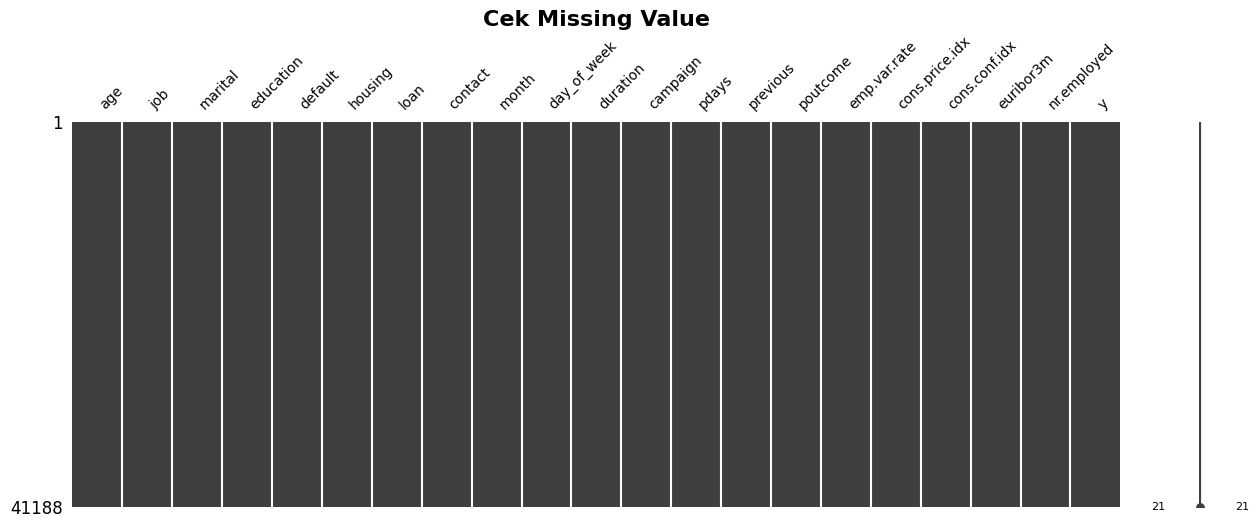

In [6]:
# Cek missing value

msno.matrix(df, figsize=(15,5), fontsize=10)
plt.title("Cek Missing Value", fontsize=16, weight="extra bold")

__Insight :__
* Dari matrix diatas memang **tidak ada missing value** pada dataset ini
* Dugaan awal missing value pada dataset ini ialah kategori "***unknown***"
* Pada tahap ini, tidak akan dilakukan treatment untuk kategori "***unknown***" untuk keperluan analisis EDA. Treatment akan dilakukan pada tahap ***Preprocessing***

### **2.4 Data Duplicated Check**, deteksi dan kuantifikasi duplikat data:

In [7]:
# Cek Data Duplikat

nDuplicated = df.duplicated().sum()
DuplicatedPerc = round((df.duplicated().sum()/df.shape[0])*100,2)
print(f'Jumlah Data Duplikat: {nDuplicated}\nPersentase Data Duplikat: {DuplicatedPerc}%')

Jumlah Data Duplikat: 12
Persentase Data Duplikat: 0.03%


__Insight:__
* Terdapat 12 data duplikat dari 41,188 baris data dengan persentase sebesar 0.03%
* Dari dataset yang disajikan tidak memiliki variabel tipe "**ID Data**", sehingga data duplikat dapat dianggap benar-benar duplikat
* Solution : Drop data duplikat tersebut

In [8]:
# Handling data duplicate

df.drop_duplicates(inplace=True)
nDuplicated = df.duplicated().sum()
DuplicatedPerc = round((df.duplicated().sum()/df.shape[0])*100,2)

print(f"*** Handling data duplikat sudah dilakukan ***\n\nJumlah Data Duplikat: {nDuplicated}\nPersentase Data Duplikat: {DuplicatedPerc}%")

*** Handling data duplikat sudah dilakukan ***

Jumlah Data Duplikat: 0
Persentase Data Duplikat: 0.0%


### **2.5 Plot Pairwise Numerical Variable**

Kita lalukan untuk uji pairwise yang dimaksudkan untuk mengumpulkan pasangan elemen yang berurutan dalam suatu dataset.

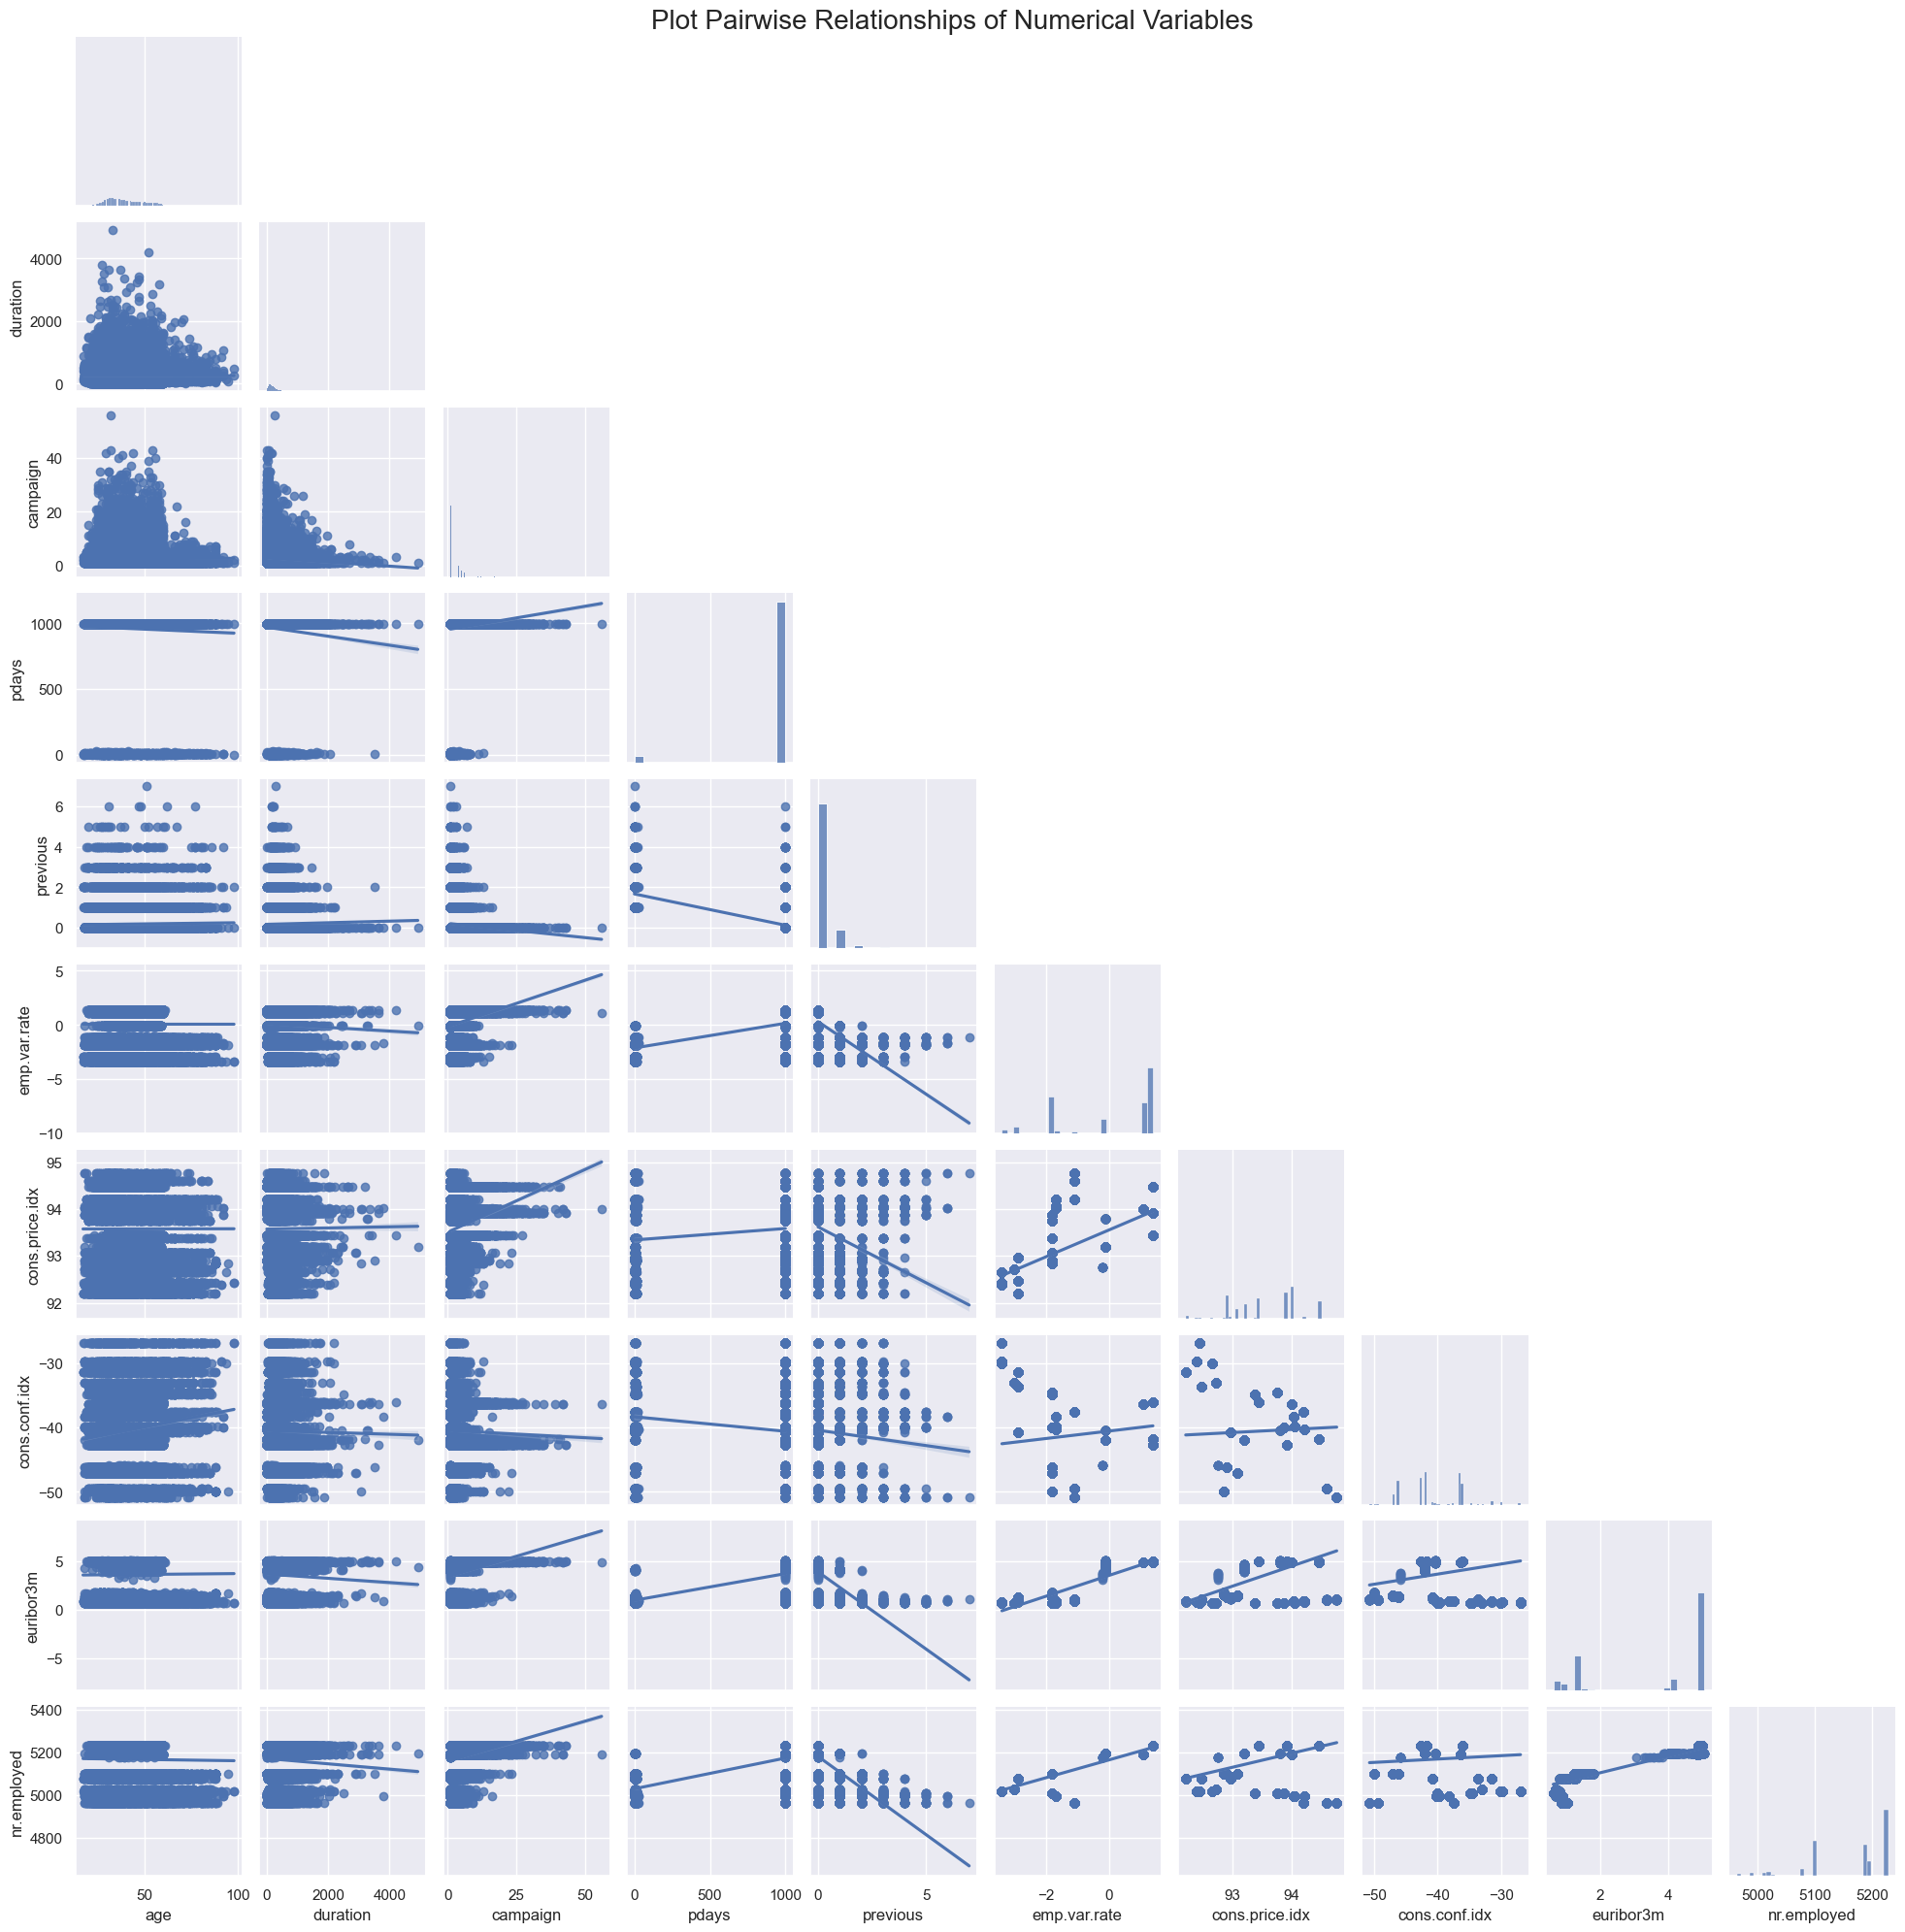

In [9]:
# Melakukan Plot Pairwise Numerical Continue Variable

numerical = [var for var in df.columns if df[var].dtype != 'continue']

sns.set(font_scale=1)
graph = sns.pairplot(df[numerical], height=2.0, corner=True, kind='reg')
graph.fig.suptitle("Plot Pairwise Relationships of Numerical Variables", y=1, fontsize=20)

plt.show()

__Insight :__
* Distribusi data dari mayoritas variabel tidak mengikuti Gaussian
* Variabel age, duration, emp.var.rate, cons.price.idx, cons.conf.idx dan euribor3m termasuk variabel continue. Sedangkan campaign, pdays, previous dan nr.employed adalah variabel diskret
* Mayoritas sebaran data cenderung tinggi

### **2.6 Cek Data Correlation & Signification**

Kita akan melakukan Data Correlation & Signification Checking untuk mengetahui seberapa besar correlation dan signification data suatu kolom terhadap kolom yang lainnya. Pengecekan correlation dan signification data perlu dilakukan untuk membantu dalam mengidentifikasi hubungan positif atau negatif antara variabel-variabel dalam dataset. Selain itu membantu memilih fitur-fitur yang paling relevan untuk membuat model yang akurat.

interval columns not set, guessing: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


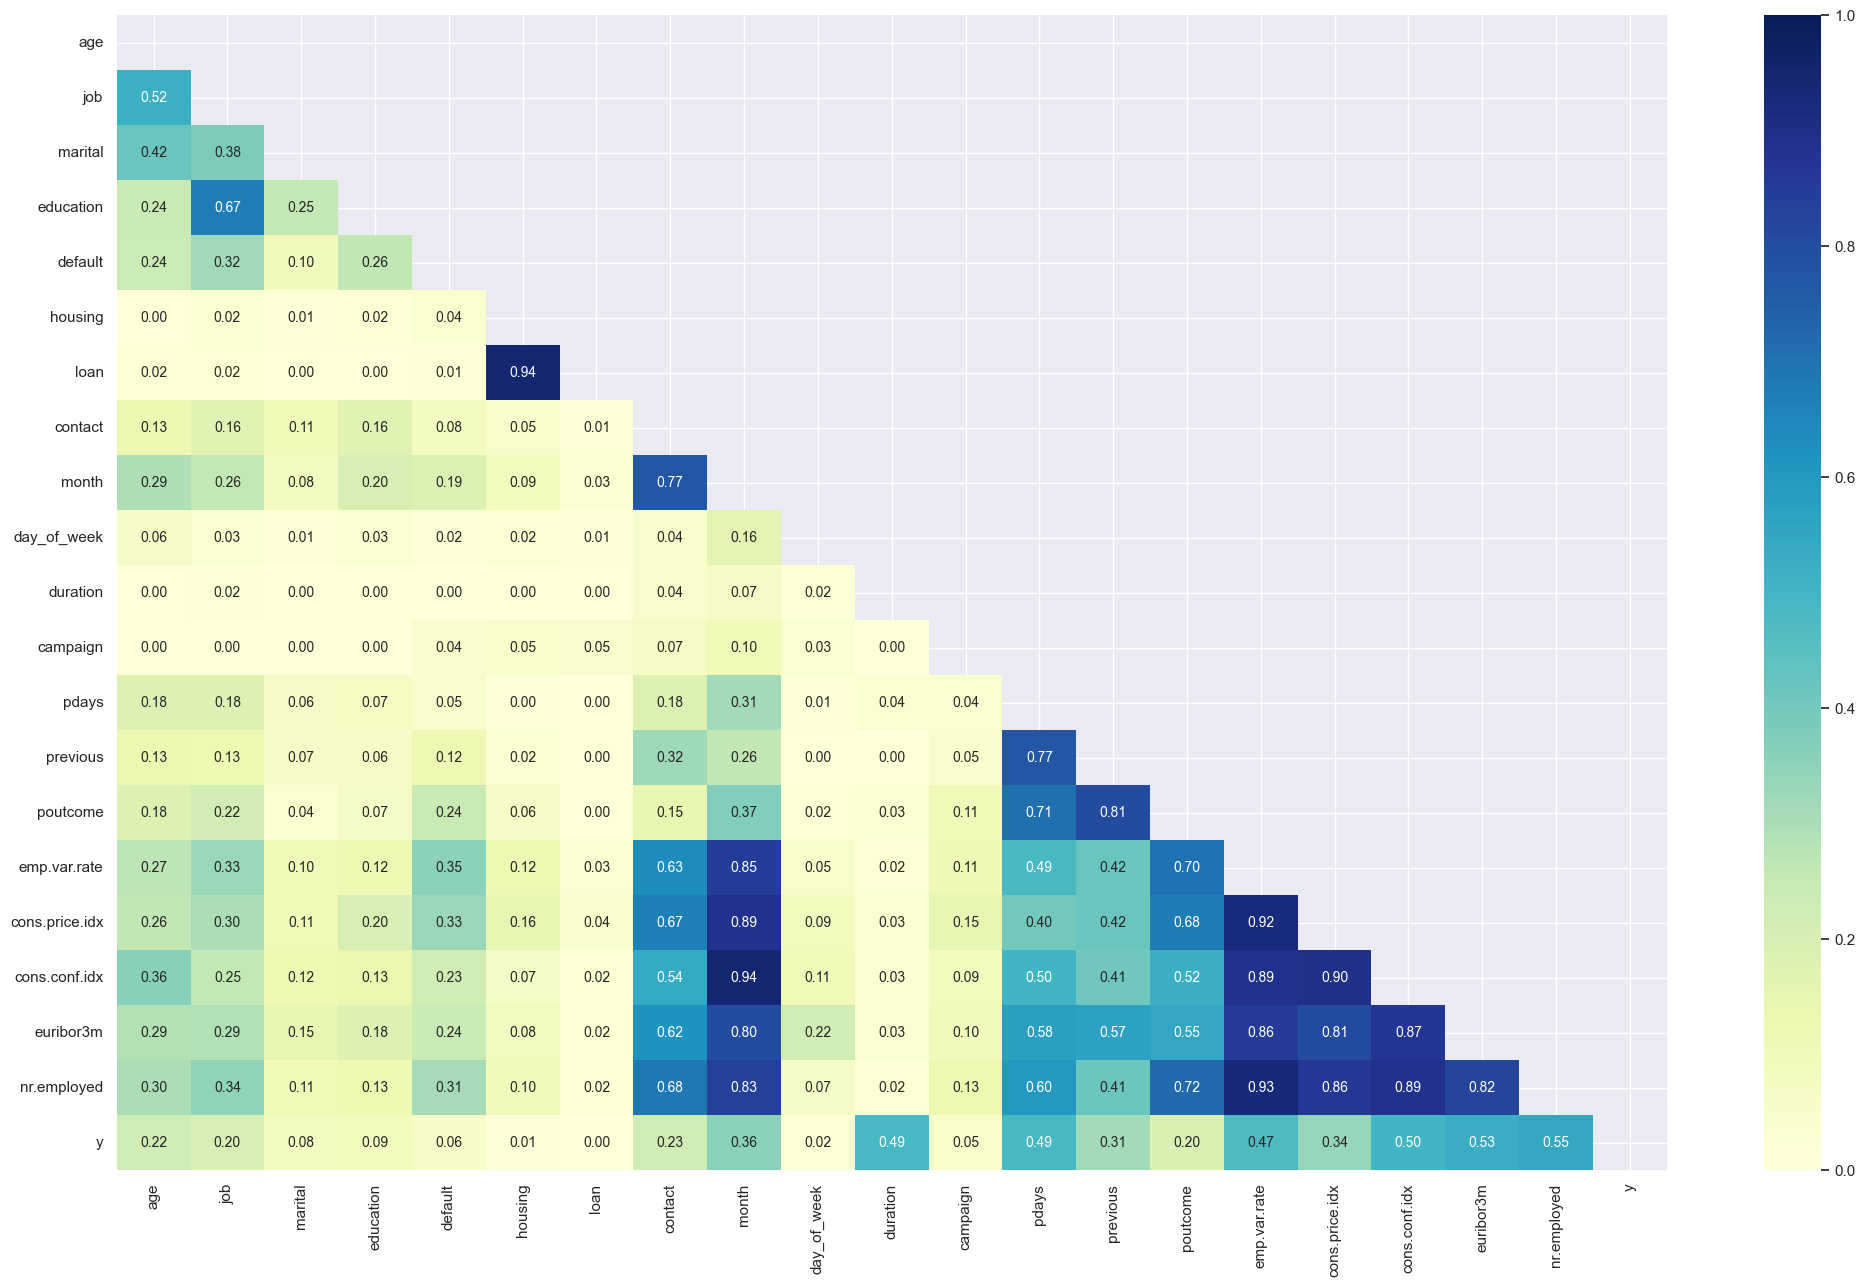

interval columns not set, guessing: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


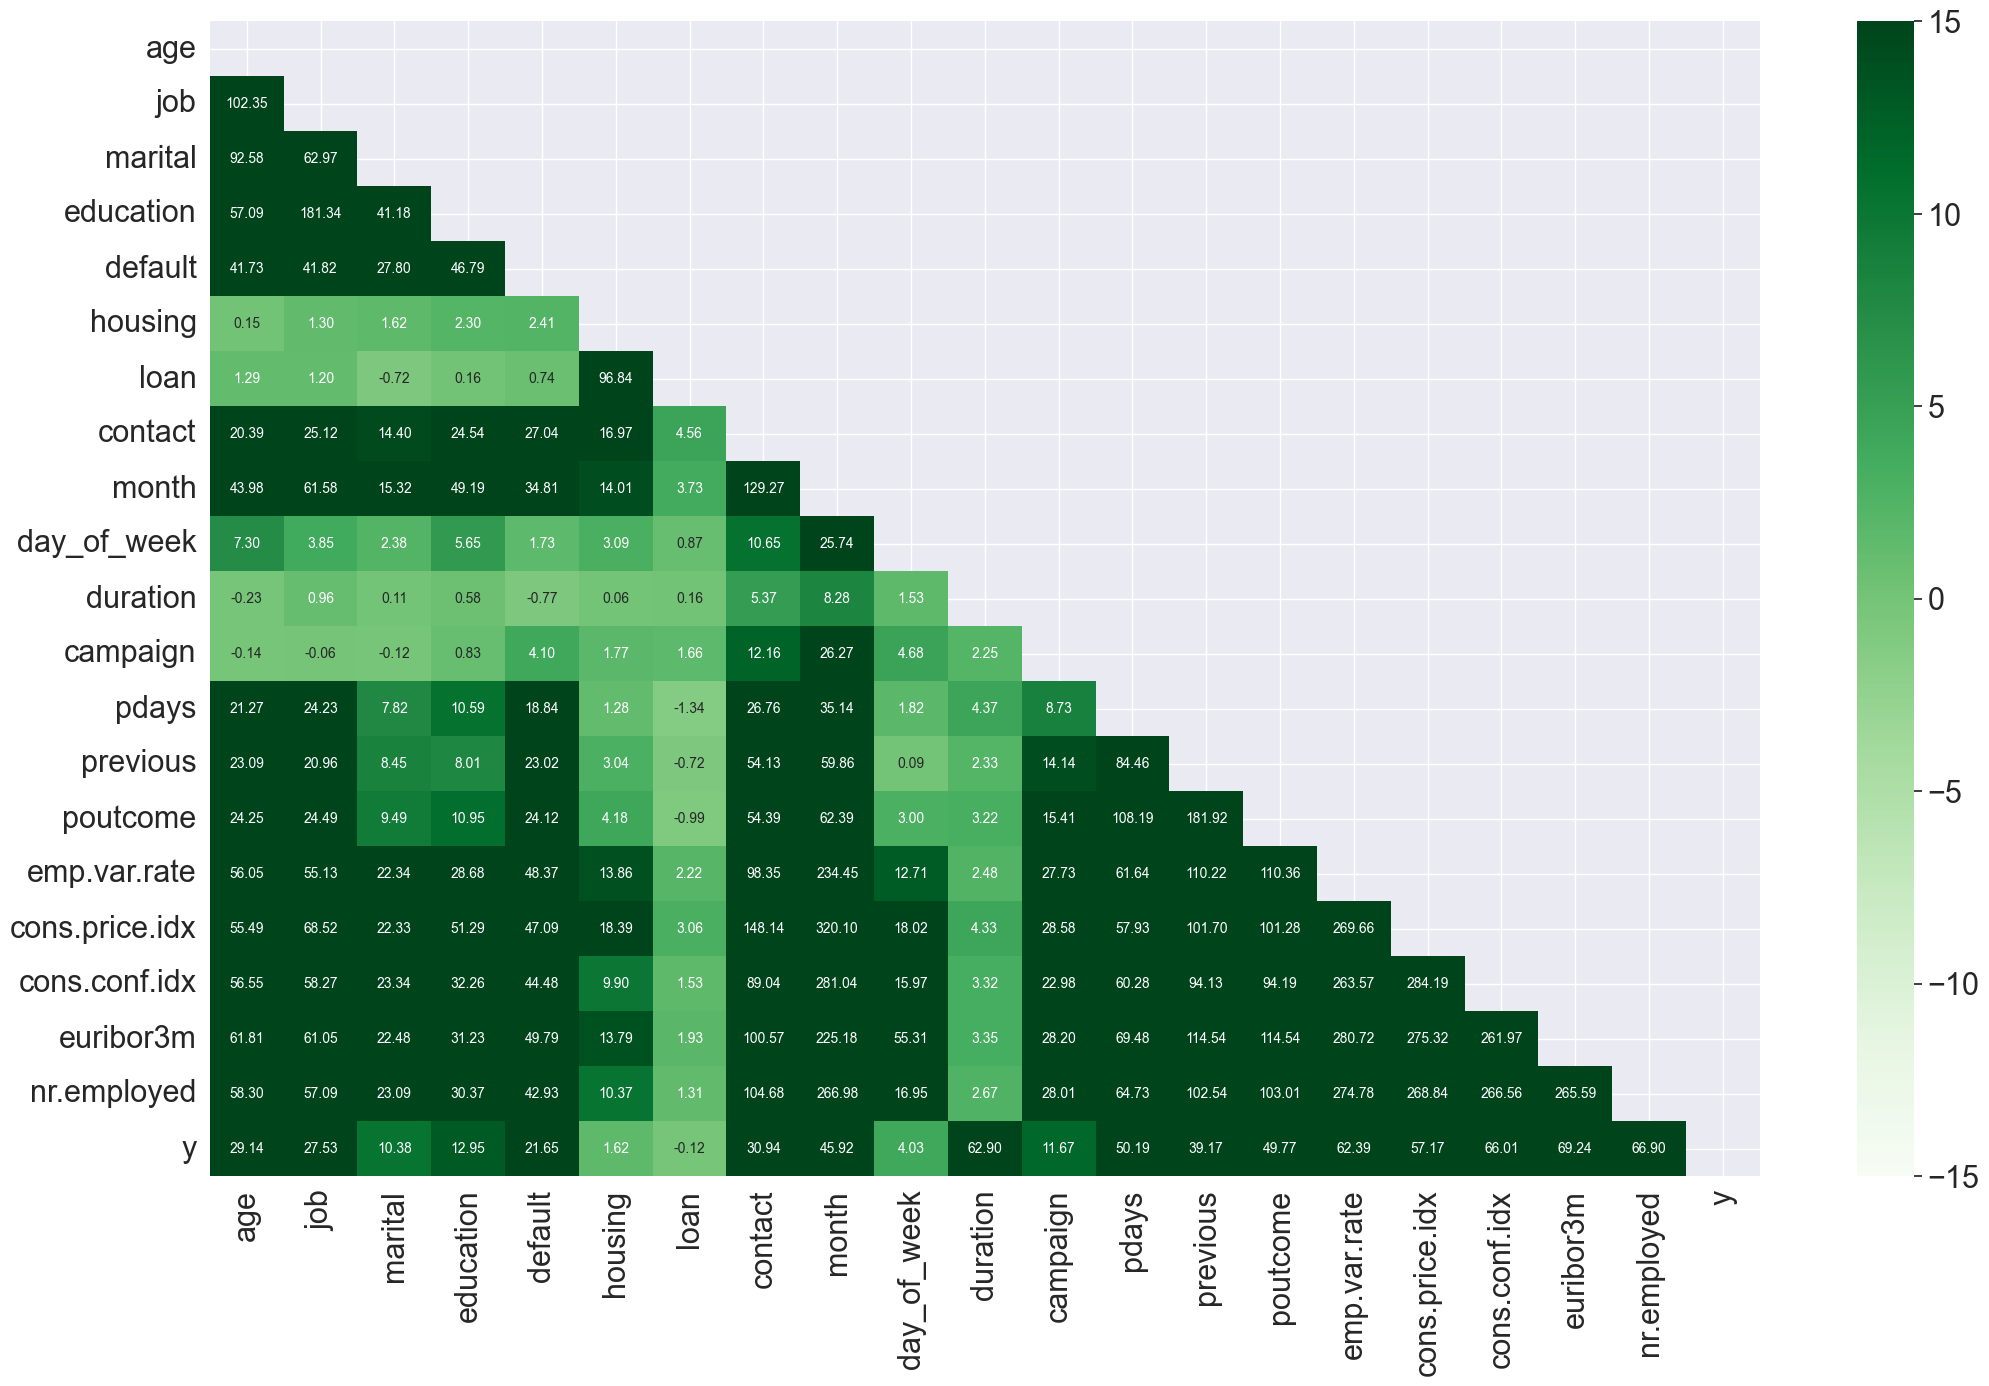

In [10]:
# Check the correlation and signification

import phik

# separating the column that we need beetween customer category, product amount and place
dfCorrMap = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']]
# heatmap of variable correlation 
fig, ax = plt.subplots(figsize=(25, 15))
phik_overview = dfCorrMap.phik_matrix()
corr_mask = np.triu(np.ones_like(phik_overview, dtype=bool))
sns.heatmap(phik_overview ,mask=corr_mask, vmin=0, vmax=1, annot=True, cmap="YlGnBu", fmt='.2f', annot_kws={"fontsize":10})
sns.set(font_scale=2)
plt.show()

# heatmap of variable significance
fig, ax = plt.subplots(figsize=(25, 15))
significance_overview = dfCorrMap.significance_matrix()
corr_mask = np.triu(np.ones_like(significance_overview, dtype=bool))
sns.heatmap(significance_overview, mask=corr_mask, vmin=-15, vmax=15, annot=True, cmap="Greens", fmt='.2f', annot_kws={"fontsize":10})
sns.set(font_scale=2)

plt.show()

Pada correlation dan signification matrix diatas menunjukkan bahwa semua fitur memiliki korelasi tinggi yaitu **'month', 'duration', 'call_category', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'**. Dimana korelasinya adalah korelasi positif. Ini berarti Bulan, waktu durasi call saat campaign, jumlah hari terakhir dari waktu nasabah dihubungi, jumlah campaign yang diterima pada bacth campaign sebelumnya, tingkat variasi dalam jumlah pekerjaan di suatu wilayah atau negara,  indeks yang mengukur perubahan harga rata-rata dari sekelompok barang dan jasa yang dikonsumsi oleh konsumen, indeks yang mengukur keyakinan konsumen dalam keadaan ekonomi saat ini dan masa depan,  tingkat suku bunga yang digunakan dalam pasar antarbank di zona euro, h jumlah orang yang bekerja dalam suatu wilayah atau negara memiliki pengaruh yang cukup besar terhadap calon nasabah yang potensial (nasabah yang ingin membuka Term Deposit).

### **2.7 Data Preparation**, menyiapkan data agar mempermudah dalam proses analisa data

Untuk mempermudah dalam proses analisis data yang akan dilakukan dalam tahap EDA. Kami lakukan proses membuat kategori pada beberapa fitur agar dapat lebih ditarik kesimpulan seberapa besar pengaruh fitur terhadap target.

#### **A. Pengelompokan pada fitur age**

Fitur `age` akan kita kelompokan menjadi beberapa kelompok usia. Berdasarkan data dari [**UNCTAD, Handbook of Statistics 2022**](https://hbs.unctad.org/age-structure/), struktur usia berdasarkan kelompok ekonomi dibagi menjadi kelompok usia 0-14, 15-24, 25-39, 40-64, 65-74, dan kelompok usia 75+

In [11]:
# Kelompokan fitur age menjadi beberapa kelompok usia

def rangeusia (age) :
    if 15 <= age <= 24 :
        return '15-24'
    elif 25 <= age <= 39 :
        return '25-39'
    elif 40 < age <= 64 :
        return '40-64'
    elif 65 < age <= 74 :
        return '65-74' 
    else :
        return '>75'

In [12]:
# Mengelompokan usia

df.insert(1,'age_range',df['age'].apply(rangeusia))
df

,age,age_range,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,40-64,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,40-64,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,25-39,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,>75,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,40-64,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,65-74,retired,married,professional.course,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,40-64,blue-collar,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,40-64,retired,married,university.degree,no,yes,no,cellular,nov,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,40-64,technician,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### **B. Pengelompokan pada fitur duration**

Fitur `duration` akan kita kelompokan menjadi beberapa kelompok berdasar jenis lamanya suatu panggilan kampanye kepada pelanngan. Berdasarkan data dari kolom duration kita 

In [13]:
# Hitung nilai minimum, maksimum, dan kuartil
min_duration = df['duration'].min()
max_duration = df['duration'].max()
q1_duration = np.percentile(df['duration'], 25)
q2_duration = np.percentile(df['duration'], 50)
q3_duration = np.percentile(df['duration'], 75)

# Tampilkan hasil
print("Minimum duration:", min_duration)
print("Q1 (25th percentile) duration:", q1_duration)
print("Q2 (50th percentile) duration:", q2_duration)
print("Q3 (75th percentile) duration:", q3_duration)
print("Maximum duration:", max_duration)

Minimum duration: 0
Q1 (25th percentile) duration: 102.0
Q2 (50th percentile) duration: 180.0
Q3 (75th percentile) duration: 319.0
Maximum duration: 4918


In [14]:
# Hitung nilai minimum, maksimum, dan kuartil
min_duration = df['duration'].min()
max_duration = df['duration'].max()
q1_duration = np.percentile(df['duration'], 25)
q2_duration = np.percentile(df['duration'], 50)
q3_duration = np.percentile(df['duration'], 75)

# Fungsi untuk mengkategorikan durasi panggilan
def categorize_duration(duration):
    if duration <= q1_duration:
        return 'very short call'
    elif duration <= q2_duration:
        return 'medium short call'
    elif duration <= q3_duration:
        return 'medium long call'
    else:
        return 'very long call'

# Buat kolom baru 'call_category' dengan kategori durasi panggilan
df.insert(12,'call_category',df['duration'].apply(categorize_duration))
df

,age,age_range,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,40-64,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,40-64,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,25-39,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,>75,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,40-64,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,65-74,retired,married,professional.course,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,40-64,blue-collar,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,40-64,retired,married,university.degree,no,yes,no,cellular,nov,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,40-64,technician,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


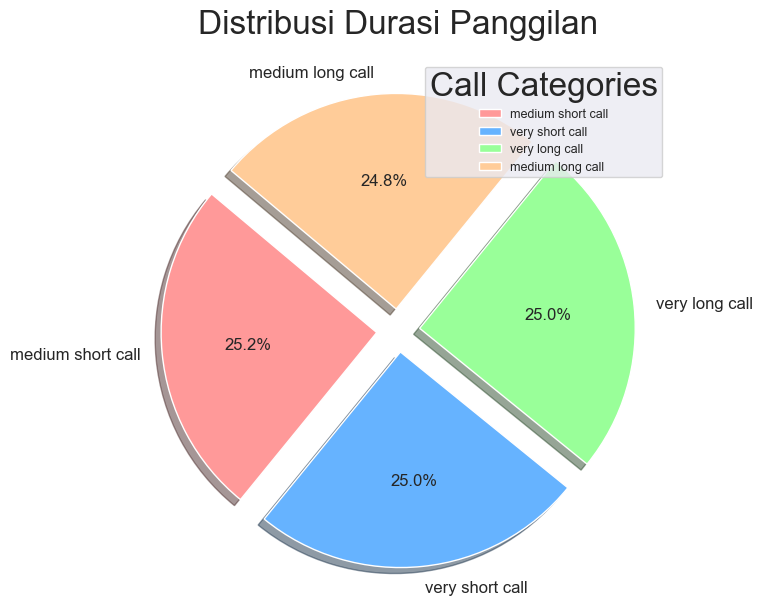

medium short call: Jumlah - 10386, Presentase - 25.22%
very short call: Jumlah - 10310, Presentase - 25.04%
very long call: Jumlah - 10284, Presentase - 24.98%
medium long call: Jumlah - 10196, Presentase - 24.76%


In [15]:
# Data
call_category_counts = df['call_category'].value_counts()
labels = call_category_counts.index
sizes = call_category_counts.values

# Warna yang berbeda untuk setiap sektor
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Eksplorasi sektor (gunakan eksplosi untuk menyoroti sektor)
explode = (0.1, 0.1, 0.1, 0.1)

# Buat diagram pie
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True, textprops={'fontsize': 12})

# Add a title with padding
plt.title('Distribusi Durasi Panggilan', pad=20)

# Menambahkan legenda dengan keterangan yang lebih jelas
legend = plt.legend(labels, title="Call Categories", loc="upper right", fontsize=8)
for text in legend.get_texts():
    text.set_fontsize(9)  # Atur ukuran font legenda

# Menampilkan diagram pie
plt.show()

# Hitung jumlah dan presentase setiap kategori
total_calls = call_category_counts.sum()
for category, count in zip(call_category_counts.index, call_category_counts):
    percentage = (count / total_calls) * 100
    print(f"{category}: Jumlah - {count}, Presentase - {percentage:.2f}%")


In [19]:
# Export data ke csv untuk EDA dan Data Preparation

import os

# Tentukan nama file CSV
nama_file_csv = 'bank_additional_data_for_eda.csv'

# Tentukan path lengkap ke folder tujuan
folder_tujuan = 'D:\Purwadhika JCDS\Capstone Project\Final Project\data\processed'

# Gabungkan nama file dengan path folder tujuan
path_file_csv = os.path.join(folder_tujuan, nama_file_csv)

# Simpan DataFrame ke file CSV di folder yang berbeda
df.to_csv(path_file_csv, index=False)

Selanjutkan akan dilakukan analisis untuk dataset pada proses data **`Exploratory Data Analysis`** dan **`Data Preprocessing`** yang akan dilakukan pada file selanjutnya.